In [1]:
import sys
print("neki")

In [ ]:
#hej

In [4]:
sys.path.append("x:\\downloads\\sketchgraphs\\sketchgraphs")

In [5]:
sys.path

['C:\\Users\\Nejako\\Documents\\MLG',
 'C:\\Users\\Nejako\\AppData\\Local\\Programs\\Python\\Python39\\python39.zip',
 'C:\\Users\\Nejako\\AppData\\Local\\Programs\\Python\\Python39\\DLLs',
 'C:\\Users\\Nejako\\AppData\\Local\\Programs\\Python\\Python39\\lib',
 'C:\\Users\\Nejako\\AppData\\Local\\Programs\\Python\\Python39',
 '',
 'C:\\Users\\Nejako\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'C:\\Users\\Nejako\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages',
 'C:\\Users\\Nejako\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\win32',
 'C:\\Users\\Nejako\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Nejako\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\Pythonwin',
 'x:\\downloads\\sketchgraphs\\sketchgraphs']

In [ ]:
#new test cell

C:\Users\Nejako\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


315228
NodeOp(label=<EntityType.External: 7>, parameters={})
NodeOp(label=<EntityType.Circle: 2>, parameters={'isConstruction': False, 'clockwise': False, 'xCenter': 0.0, 'yCenter': 0.0, 'xDir': 1.0, 'yDir': 0.0, 'radius': 0.0185})
EdgeOp(label=<ConstraintType.Diameter: 12>, references=(1,), parameters={'length': '0.037 METER'})
NodeOp(label=<SubnodeType.SN_Center: 103>, parameters={})
EdgeOp(label=<ConstraintType.Subnode: 101>, references=(2, 1), parameters={})
EdgeOp(label=<ConstraintType.Coincident: 0>, references=(2, 0), parameters={})
NodeOp(label=<EntityType.Circle: 2>, parameters={'isConstruction': False, 'clockwise': False, 'xCenter': 0.0, 'yCenter': 0.0, 'xDir': 1.0, 'yDir': 0.0, 'radius': 0.032})
EdgeOp(label=<ConstraintType.Diameter: 12>, references=(3,), parameters={'length': '0.064 METER'})
NodeOp(label=<SubnodeType.SN_Center: 103>, parameters={})
EdgeOp(label=<ConstraintType.Subnode: 101>, references=(4, 3), parameters={})
EdgeOp(label=<ConstraintType.Coincident: 0>, refe

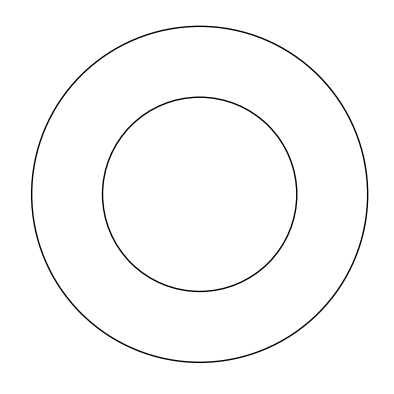

In [8]:
import sketchgraphs.data as datalib
import random
from sketchgraphs.data import flat_array
seq_data = flat_array.load_dictionary_flat('datasets/sg_t16_validation.npy')
print(len(seq_data['sequences']))

seq = seq_data['sequences'][random.randint(0, 315228)]
print(*seq[:20], sep='\n')
sketch = datalib.sketch_from_sequence(seq)
datalib.render_sketch(sketch);

In [11]:
import numpy as np
f = open("datasets/exported/test_save1.npz", "wb")
np.savez_compressed(f, seq_data['sequences'])
f.close()

Exception ignored in: <function ZipFile.__del__ at 0x000002004A0D2160>
Traceback (most recent call last):
  File "C:\Users\Nejako\AppData\Local\Programs\Python\Python39\lib\zipfile.py", line 1807, in __del__
  File "C:\Users\Nejako\AppData\Local\Programs\Python\Python39\lib\zipfile.py", line 1824, in close
ValueError: seek of closed file


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (315228,) + inhomogeneous part.

In [13]:
import numpy as np
#testSaved = np.load("datasets/test_save1.npz", allow_pickle=True)
testSeq = seq_data['sequences']

In [13]:
#print(*testSeq[0], sep="\n")

NodeOp(label=<EntityType.External: 7>, parameters={})
NodeOp(label=<EntityType.Circle: 2>, parameters={'isConstruction': False, 'clockwise': False, 'xCenter': 0.0, 'yCenter': 0.0, 'xDir': 1.0, 'yDir': 0.0, 'radius': 0.07468157776994294})
NodeOp(label=<SubnodeType.SN_Center: 103>, parameters={})
EdgeOp(label=<ConstraintType.Subnode: 101>, references=(2, 1), parameters={})
EdgeOp(label=<ConstraintType.Coincident: 0>, references=(2, 0), parameters={})
NodeOp(label=<EntityType.Circle: 2>, parameters={'isConstruction': False, 'clockwise': False, 'xCenter': 0.0, 'yCenter': 0.0, 'xDir': 1.0, 'yDir': 0.0, 'radius': 0.06665470513285787})
NodeOp(label=<SubnodeType.SN_Center: 103>, parameters={})
EdgeOp(label=<ConstraintType.Subnode: 101>, references=(4, 3), parameters={})
EdgeOp(label=<ConstraintType.Coincident: 0>, references=(4, 2), parameters={})
NodeOp(label=<EntityType.Stop: 8>, parameters={})


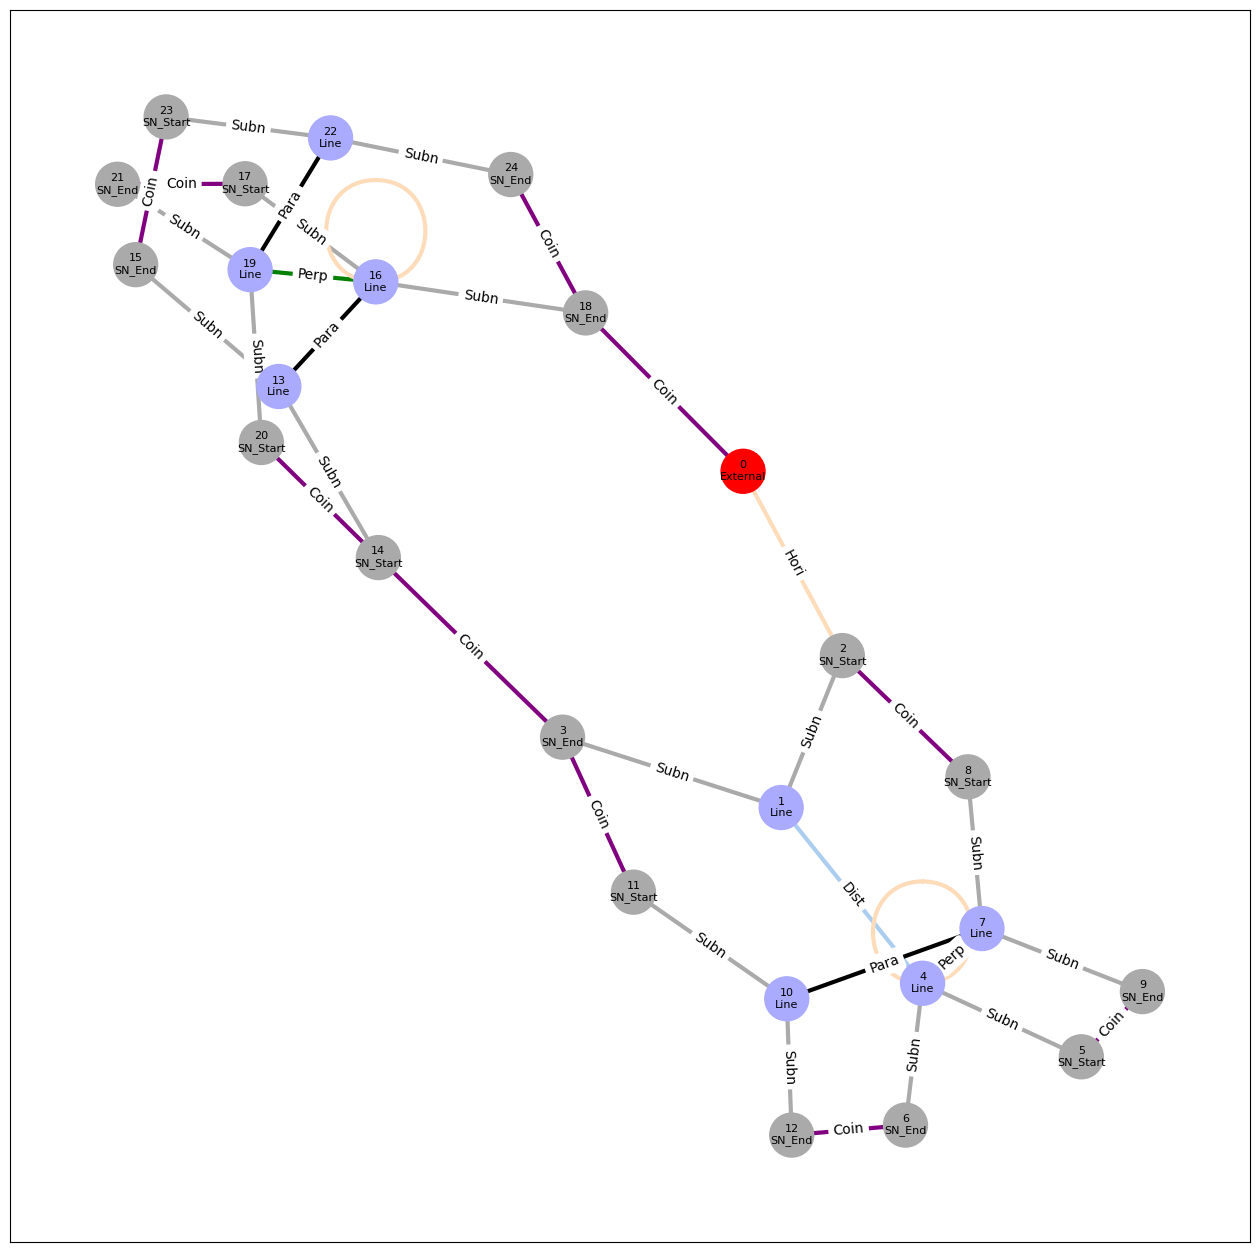

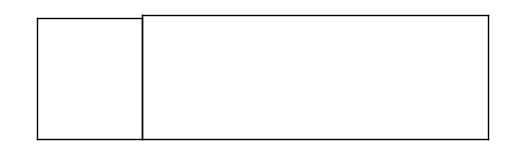

In [14]:
import networkx as nx
import sketchgraphs
import sketchgraphs.data as datalib
import matplotlib.pyplot as plt
import graphviz
import math
seq = testSeq[14]
#print(*seq, sep="\n")
pgvgraph = sketchgraphs.data.sequence.pgvgraph_from_sequence(seq)
g = nx.Graph(pgvgraph)
#print(g.nodes(data=True))
#print(g.edges(data=True))

l = nx.get_node_attributes(g, 'label')
for lab in l:
    l[lab] = lab + "\n" + l[lab]
    
e = nx.get_edge_attributes(g, 'label')
for lab in e:
    e[lab] = e[lab][:4]
#print(e)
pos = nx.spring_layout(g, k=1/math.sqrt(g.number_of_nodes()), iterations=g.number_of_nodes()*20)

#coloring nodes
node_type_colors = {
    "External": "red",
    "SN_Start": "#AAAAAA",
    "SN_End": "#AAAAAA",
    "Line": "#AAAAFF"
}

#edge_color
edge_type_colors = {
    "Subnode": "#AAAAAA",
    "Vertical": "blue",
    "Horizontal": "#FEDCBA",
    "Perpendicular": "green",
    "Parallel": "black",
    "Coincident": "purple",
    "Distance": "#ABCDEF",
    "Diameter": "orange"
}

node_colors=[]
edge_colors=[]

for n in g.nodes.values():
    label = n["label"]
    if label in node_type_colors:
        node_colors.append(node_type_colors[label])
    else:
        node_colors.append("white")
        
for n in g.edges.values():
    label = n["label"]
    if label in edge_type_colors:
        edge_colors.append(edge_type_colors[label])
    else:
        edge_colors.append("black")

plt.figure(1, figsize=(16, 16))
nx.draw_networkx_nodes(g, pos=pos, node_size=1000, node_color=node_colors)
nx.draw_networkx_edges(g, pos, edge_color=edge_colors, width=3)
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=e, font_size=10)
nx.draw_networkx_labels(g, pos, l, font_size=8)
plt.show()
sketch = datalib.sketch_from_sequence(seq)
datalib.render_sketch(sketch);

In [ ]:
print(*seq, sep='\n')
sketch = datalib.sketch_from_sequence(seq)
datalib.render_sketch(sketch);

In [ ]:
import os
!dir